### Predict the location of the next crime in a series based on previous crimes. This uses a time weighted Kernel Density Estimation to determine the approximate location of next events. The idea for this method can be found in this paper: 
http://www.academia.edu/1926355/Evaluating_temporally_weighted_kernel_density_methods_for_predicting_the_next_event_location_in_a_series

In [1]:
# Get time data
import pandas as pd
times = pd.HDFStore('store.h5')
times = times['data_subset']

In [54]:
import pandas as pd
import numpy as np
#!pip install pandas --upgrade

data_full = pd.read_csv('crimes.csv')

In [55]:
#  Remove unwanted columns from the data
# Add 'Date' back in when RJ fixes the datetime converter
useful_columns = ['X Coordinate', 'Y Coordinate', 'Date', 'Community Area', 'IUCR']
data_full = data_full[useful_columns]

In [ ]:
data_full = pd.merge(data_full, times, how='right', on='Date')
data_full.head()

In [5]:
# Also resample to a smaller size for now
sample_size = 5000
data = data_full[data_full['Community Area'] == 25]
data = data[data['']]
data = data.sample(sample_size)
data = data.dropna()
data = data[data['X Coordinate'] != 0]
data.tail()

,X Coordinate,Y Coordinate,Date,Community Area,Year,Month,Day,Hour
41554275,1139391.0,1904361.0,02/05/2009 12:00:00 PM,25.0,2009,02,4,12
41922628,1145011.0,1910225.0,06/16/2008 09:00:00 AM,25.0,2008,06,1,09
45013628,1141223.0,1904450.0,09/13/2008 12:00:00 AM,25.0,2008,09,6,00
17691566,1139900.0,1899029.0,08/11/2002 12:00:00 PM,25.0,2002,08,0,12
24699309,1145436.0,1897949.0,02/19/2004 03:50:00 AM,25.0,2004,02,4,03


In [6]:
len(data)

4882

In [7]:
from sklearn.cross_validation import train_test_split

indep_var = data.columns.values
X = data[indep_var]
# Split into test and training data
X_train, X_test = train_test_split(X, test_size=0.33, random_state=42)

In [12]:
from sklearn.neighbors import KernelDensity
from sklearn.grid_search import GridSearchCV

options = {'bandwidth': [2, 5, 10, 20, 70, 100, 120, 200, 500]}
kd = KernelDensity()
clf = GridSearchCV(kd, options)

In [13]:
X_loc = X_train[['X Coordinate', 'Y Coordinate']]
clf.fit(X_loc)

GridSearchCV(cv=None, error_score='raise',
       estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'bandwidth': [2, 5, 10, 20, 70, 100, 120, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [14]:
clf.best_estimator_

KernelDensity(algorithm='auto', atol=0, bandwidth=100, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [15]:
clf.best_score_

-30245.630277780212

In [42]:
%matplotlib inline
import numpy as np
from bokeh.plotting import figure, output_notebook, show
import matplotlib.pyplot as plt
output_notebook()

def histogram(x,colors=None):
    hist,edges = np.histogram(x, bins=100)
    p = figure(y_axis_label="Pixels",
               tools='', height=130, outline_line_color=None,
               min_border=0, min_border_left=0, min_border_right=0,
               min_border_top=0, min_border_bottom=0)
    p.quad(top=hist[1:], bottom=0, left=edges[1:-1], right=edges[2:])
    print("min: {}, max: {}".format(np.min(x),np.max(x)))
    show(p)
    
def histogram2d(x, y, colors=None):
    plt.hist2d(x, y, bins=50)
    plt.show()

Loading BokehJS ...

In [20]:
histogram(X_train['X Coordinate'])

min: 1127702.0, max: 1145800.0


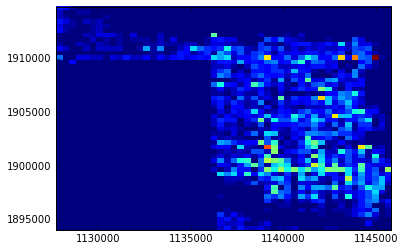

In [43]:
histogram2d(data['X Coordinate'].astype(float), data['Y Coordinate'].astype(float))

In [39]:
histogram(X_train['Y Coordinate'].astype(float))

min: 1894064.0, max: 1914839.0


In [51]:
# Plot the results:
values = clf.best_estimator_.sample(n_samples=100000)
values

array([[ 1141391.94450069,  1911418.23705486],
       [ 1138874.20674275,  1908133.6586474 ],
       [ 1136710.14756975,  1903597.94167838],
       ..., 
       [ 1143213.21816939,  1899586.37909343],
       [ 1138891.83014122,  1901965.4236568 ],
       [ 1137224.95627279,  1905332.06804096]])

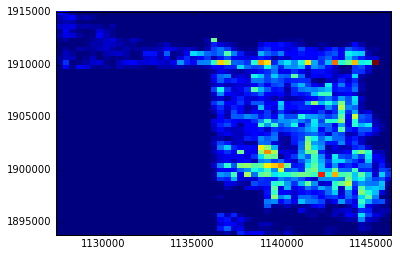

In [52]:
histogram2d(values[:,0], values[:,1])

AttributeError: 'KernelDensity' object has no attribute 'plot'